In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# Librerías

import matplotlib
from scipy import misc
from scipy import stats
from scipy import special
import pylab as plt
import numpy as np
import math

%matplotlib inline

font = {'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

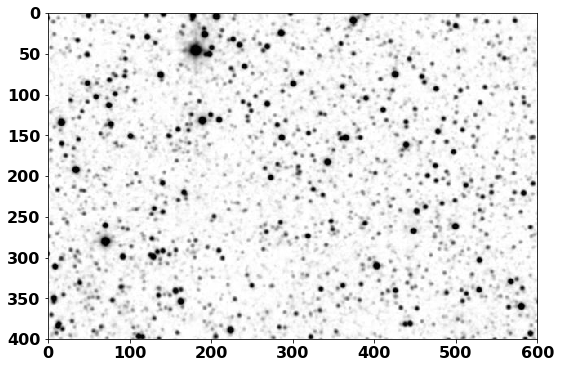

In [2]:
from PIL import Image
import PIL.ImageOps    

image = Image.open('stars.jpg')

inverted_image = PIL.ImageOps.invert(image)

inverted_image.save('stars_inv.png')


Ima = misc.imread('stars_inv.png') # Se lee la imagen como matriz en escala de 8 bit
plt.rcParams['figure.figsize'] = 20, 6 # para modificar el tamaño de la figura
Imab = Ima[100:500,100:700,1] # La imagen original tenía tres canales (RGB); se elige un canal y se recorta

plt.figure(2)
plt.imshow(Imab, cmap='gray')


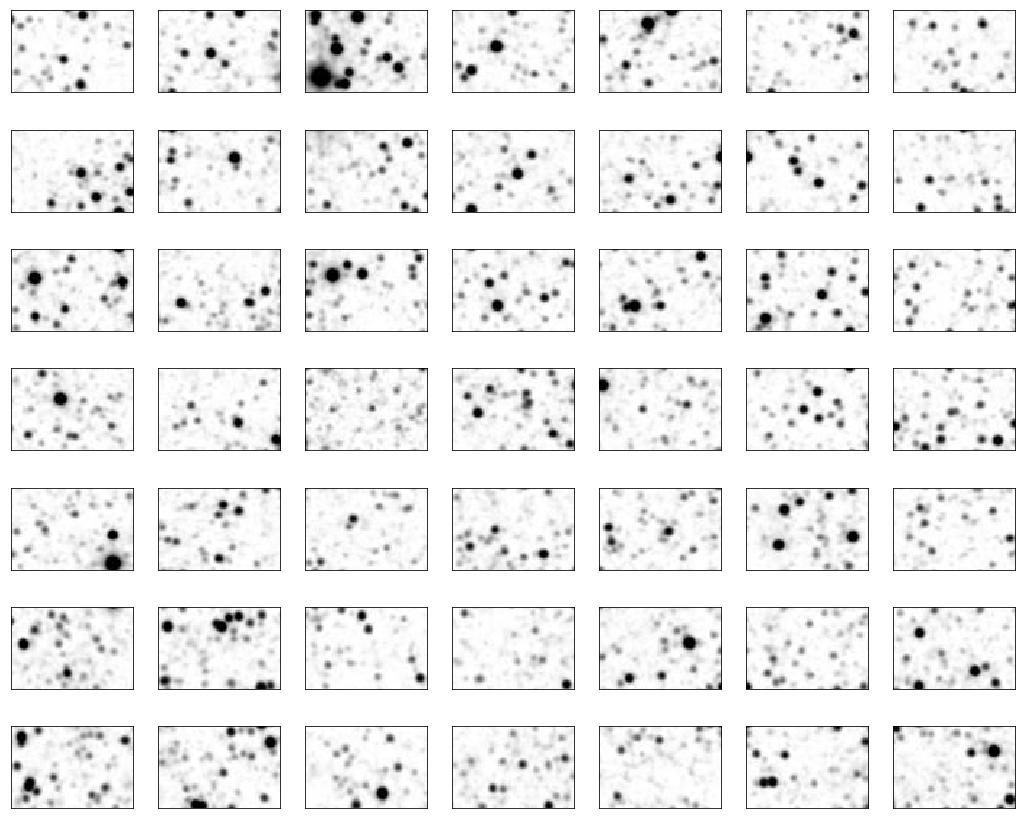

In [3]:
plt.rcParams['figure.figsize'] = 18, 15 # para modificar el tamaño de la figura
fil, col = Imab.shape # número de filas y columnas de la imagen
numlado = 7# Número de imágenes por lado
contar = 1
plt.figure(5)
for enfil in range(1,numlado+1):
    for encol in range(1,numlado+1):
        plt.subplot(numlado,numlado,contar)
        plt.imshow(Imab[(enfil-1)*np.int(fil/numlado):enfil*np.int(fil/numlado), \
                        (encol-1)*np.int(col/numlado):encol*np.int(col/numlado)],cmap='gray')
        frame1 = plt.gca()
        frame1.axes.get_yaxis().set_visible(False)
        frame1.axes.get_xaxis().set_visible(False)
        contar = contar + 1

Valor promedio del conjunto de datos = 27.92


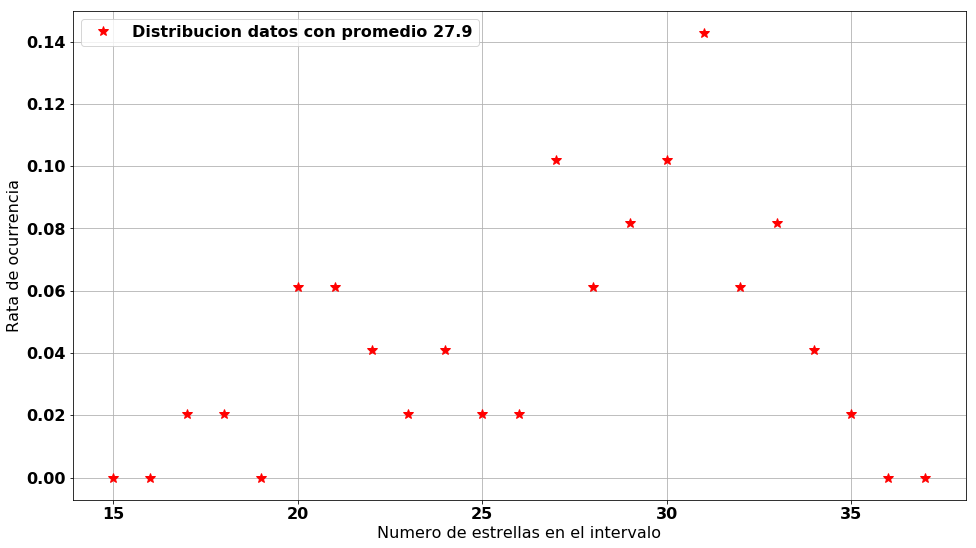

In [4]:
# Para el caso de 7x7 imágenes en gal se presentan el número de estrellas contadas
est = np.array([33., 21., 30., 34., 33., 31., 21., \
                32., 28., 31., 24., 31., 18., 22., \
               30., 27., 44., 22., 25., 31., 31., \
               31., 20., 27., 32., 31., 28., 35., \
               29., 21., 23., 30., 30., 27., 26., \
               32., 34., 20., 17., 27., 30., 29., \
               33., 29., 24., 27., 28., 20., 29.])
la = np.mean(est) # Valor promedio del conjunto de datos

# Distribución del conjunto de datos. La primera fila es el número de estrellas, la segunda es el número de veces que
# se repite dicho número de estrellas
distriEst = np.array([[15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37.],[0., 0., 1., 1., 0., 3., 3., 2., 1., 2., 1., 1., 5., 3., 4., 5., 7., 3., 4., 2., 1., 0., 0.]])

print('Valor promedio del conjunto de datos = %.2f' % la)
plt.figure(figsize=(16,9))
plt.plot(distriEst[0,:],distriEst[1,:]/est.size,'r*',ms=10,label='Distribucion datos con promedio %.1f' % la)
plt.legend()
plt.xlabel('Numero de estrellas en el intervalo')
plt.ylabel('Rata de ocurrencia')
plt.grid()

In [12]:
num = 28. # Número de estrellas que se espera encontrar
prob = (la**num*np.exp(-la)/math.factorial(num))*100 # Probabilidad de encontrar dicho número de estrellas

x = np.arange(15,37) # rango de datos: número de estrellas
histP = stats.poisson.pmf(x, la) # función de probabilidad de Poisson
ProbP = (np.sum(histP[0:int(num)+1]))*100 # Probabilidad acumulada

print('Promedio de estrellas en el área estudiada = %.2f' % la)
print('La probabilidad de que se observe en la imagen del espacio profundo %d estrellas es = %.1f%%' % (num,prob))
print('Probabilidad de observar hasta %d estrellas = %.1f%%' %(num,ProbP))

Promedio de estrellas en el área estudiada = 27.92
La probabilidad de que se observe en la imagen del espacio profundo 28 estrellas es = 7.5%
Probabilidad de observar hasta 28 estrellas = 94.0%


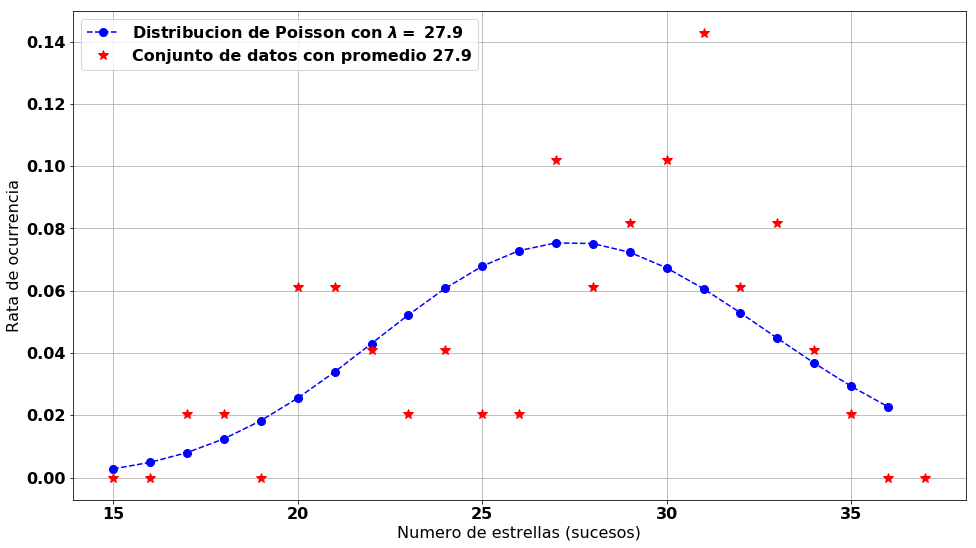

In [13]:
plt.figure(figsize=(16,9))
plt.plot(x, histP, 'bo--', ms=8, label='Distribucion de Poisson con $\lambda=$ %.1f' % la)
plt.plot(distriEst[0,:],distriEst[1,:]/est.size,'r*',ms=10,label='Conjunto de datos con promedio %.1f' % la)
plt.xlabel('Numero de estrellas (sucesos)')
plt.ylabel('Rata de ocurrencia')
plt.legend()
plt.grid()

In [7]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Pulse para codigo</button>''', raw=True)

Pulse para codigo